<a href="https://colab.research.google.com/github/danglive/Machine_Learning/blob/master/SVM_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Support vector machines

In [3]:
!apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aglfn epstool fonts-droid-fallback fonts-noto-mono ghostscript gnuplot-data
  gnuplot-qt gsfonts imagemagick-6-common info install-info libamd2
  libauthen-sasl-perl libcamd2 libccolamd2 libcholmod3 libcolamd2
  libcupsfilters1 libcupsimage2 libcxsparse3 libdata-dump-perl libemf1
  libencode-locale-perl libfftw3-single3 libfile-listing-perl libfltk-gl1.3
  libfltk1.3 libfont-afm-perl libglpk40 libgraphicsmagick++-q16-12
  libgraphicsmagick-q16-3 libgs9 libgs9-common libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libijs-0.35 libio-html-perl
  libio-so

In [0]:
import csv
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.svm import SVC, LinearSVC

%matplotlib inline

In [0]:
def plot_data(X, y):
    '''Plots examples X and their class y in a 2D scatter plot.
    
    X must be an array of shape (m,2)
    y must be an array of shape (m,)
    '''
    
    plt.plot(X[y == 0,0], X[y == 0,1], 'yo', label='neg')
    plt.plot(X[y == 1,0], X[y == 1,1], 'b+', label='pos')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='lower left')
    
def plot_boundary(X, clf, level=0.0):
    '''Plots a decision boundary using trained classifier clf.
    
    The decision boundary is drawn at given level (default=0.0)
    in the range of X. X must be an array of shape (m,2).
    '''
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    h = 0.01 # grid step size
    grid_x1, grid_x2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                                   np.arange(x2_min, x2_max, h))
    
    grid_y = clf.predict(np.c_[grid_x1.ravel(), grid_x2.ravel()])
    grid_y = grid_y.reshape(grid_x1.shape)

    x1_extra = (x1_max - x1_min) / 50
    x2_extra = (x2_max - x2_min) / 50
    
    plt.xlim(x1_min - x1_extra, x1_max + x1_extra)
    plt.ylim(x2_min - x2_extra, x2_max + x2_extra)
    
    plt.contour(grid_x1, grid_x2, grid_y, levels=[level])
    
def plot_support_vectors(clf):
    '''Plot the support vectors from trained support vector classifier clf.
    
    Only the support vectors of the first two classes are drawn.
    '''
    
    # Obtain support vectors for first two classes
    sv_neg, sv_pos = np.vsplit(clf.support_vectors_, np.cumsum(clf.n_support_)[0:1])

    # Plot support vectors
    plt.plot(sv_neg[:,0], sv_neg[:,1], 'r+', label='neg SVs', alpha=0.5)
    plt.plot(sv_pos[:,0], sv_pos[:,1], 'rx', label='pos SVs', alpha=0.5)
    plt.legend()

**Spam classification**

In [32]:
!wget https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/ex6data1.mat?raw=true

--2019-12-15 16:48:42--  https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/ex6data1.mat?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/krasserm/machine-learning-notebooks/raw/master/data/ml-ex6/ex6data1.mat [following]
--2019-12-15 16:48:42--  https://github.com/krasserm/machine-learning-notebooks/raw/master/data/ml-ex6/ex6data1.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krasserm/machine-learning-notebooks/master/data/ml-ex6/ex6data1.mat [following]
--2019-12-15 16:48:43--  https://raw.githubusercontent.com/krasserm/machine-learning-notebooks/master/data/ml-ex6/ex6data1.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Conn

In [34]:
# rename the file
!mv ex6data1.mat?raw=true data.mat
# update scipy
!pip install -U -q scipy
# Load the data
from scipy import io
data = io.loadmat('data.mat')

mv: cannot stat 'ex6data1.mat?raw=true': No such file or directory


In [0]:
# Examples with features x1 and x2
X = data['X']
# Examples target class (0=neg, 1=pos)
y = data['y'].ravel()

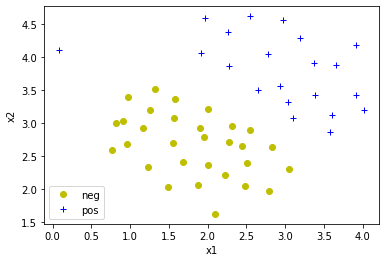

In [37]:
plot_data(X,y)

In [38]:
# Train a support vector classifier with C=1 using a linear kernel.
# SVC uses libsvm. For scaling to a large number of examples consider
# using LinearSVC which uses liblinear instead (see docs for details).
clf = SVC(C=1, kernel='linear') 
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: No contour levels were found within the data range.


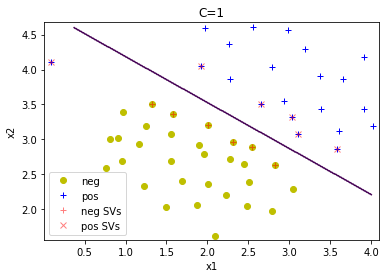

In [40]:
plot_data(X, y)
plot_boundary(X, clf)
plot_support_vectors(clf)
plt.title('C=1')
plt.show()

In [41]:
clf = SVC(C=100, kernel='linear')
clf.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: No contour levels were found within the data range.


Text(0.5, 1.0, 'C=100')

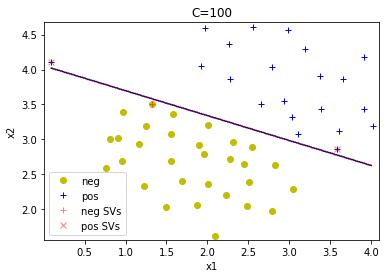

In [42]:
plot_data(X, y)
plot_boundary(X, clf)
plot_support_vectors(clf)
plt.title('C=100')

**SVM with Gaussian kernel**


An RBF kernel with gamma=1/sigma2 is know as Gaussian kernel of variance sigma2.

In [43]:
# Load dataset 2
!wget https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/ex6data2.mat?raw=true

--2019-12-15 16:53:10--  https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/ex6data2.mat?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/krasserm/machine-learning-notebooks/raw/master/data/ml-ex6/ex6data2.mat [following]
--2019-12-15 16:53:10--  https://github.com/krasserm/machine-learning-notebooks/raw/master/data/ml-ex6/ex6data2.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krasserm/machine-learning-notebooks/master/data/ml-ex6/ex6data2.mat [following]
--2019-12-15 16:53:10--  https://raw.githubusercontent.com/krasserm/machine-learning-notebooks/master/data/ml-ex6/ex6data2.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Conn

In [48]:
!mv ex6data2.mat?raw=true data.mat
data = io.loadmat('data.mat')

mv: cannot stat 'ex6data2.mat?raw=true': No such file or directory


In [0]:
# Examples with features x1 and x2
X = data['X']
# Examples target class (0=neg, 1=pos)
y = data['y'].ravel()

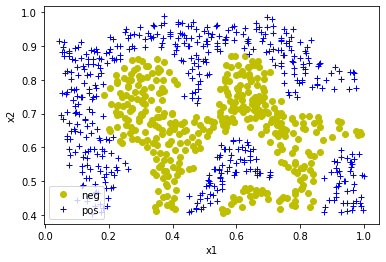

In [50]:
# Plot dataset 2
plot_data(X, y)

In [51]:
# Train a support vector classifier with C=1 using an RBF kernel.
# In ex6.m (original Octave exercise code), sigma=0.1, hence we
# set gamma to 100 (=1/sigma**2)
clf = SVC(C=1, kernel='rbf', gamma=100)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: No contour levels were found within the data range.


Text(0.5, 1.0, 'C=1, gamma=100')

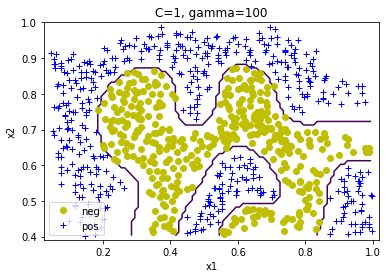

In [52]:
plot_data(X, y)
plot_boundary(X, clf)
plt.title('C=1, gamma=100')

In [53]:
# Load dataset 3
!wget https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/ex6data3.mat?raw=true
!mv ex6data3.mat?raw=true data.mat
data = io.loadmat('data.mat')

--2019-12-15 16:57:37--  https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/ex6data3.mat?raw=true
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/krasserm/machine-learning-notebooks/raw/master/data/ml-ex6/ex6data3.mat [following]
--2019-12-15 16:57:37--  https://github.com/krasserm/machine-learning-notebooks/raw/master/data/ml-ex6/ex6data3.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krasserm/machine-learning-notebooks/master/data/ml-ex6/ex6data3.mat [following]
--2019-12-15 16:57:37--  https://raw.githubusercontent.com/krasserm/machine-learning-notebooks/master/data/ml-ex6/ex6data3.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Conn

In [0]:
# Training data 
X_train_0 = data['X']
y_train_0 = data['y'].ravel()

# Validation data
X_cv_0 = data['Xval']
y_cv_0 = data['yval'].ravel()

Text(0.5, 1.0, 'Training data')

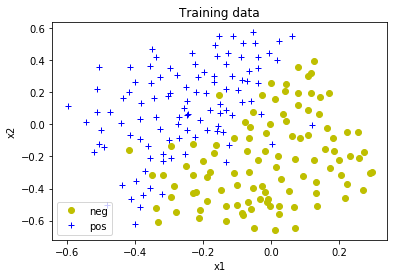

In [55]:
plot_data(X_train_0, y_train_0)
plt.title('Training data')

Text(0.5, 1.0, 'Validation data')

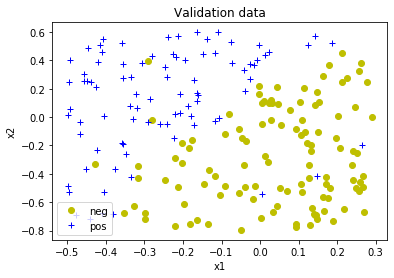

In [56]:
plot_data(X_cv_0, y_cv_0)
plt.title('Validation data')

In [0]:
# Concatenate training and validation data
X = np.concatenate([X_train_0, X_cv_0])
y = np.concatenate([y_train_0, y_cv_0])

num_train = X_train_0.shape[0]
num_cv = X_cv_0.shape[0]

# Create a cross validator that selects the pre-defined 
# validation dataset from the concatenated dataset.
cv_fold = np.empty(num_train + num_cv, dtype='int8')
cv_fold[:num_train] = -1
cv_fold[num_train:] = 0
cv = PredefinedSplit(cv_fold)

In [0]:
# Values for grid search (see description in ex6.pdf)
grid = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])

# Grid values for C
grid_C = grid
# Grid values for gamma
grid_gamma = 1 / (grid ** 2)

In [59]:
# Classifier used for grid search
clf = SVC(kernel='rbf')

# Grid search to find the best C and gamma values using the predefined
# training and validation set.
gs = GridSearchCV(clf, param_grid={'C':grid_C, 'gamma':grid_gamma}, cv=cv)
gs.fit(X, y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-02, 3.e-02, 1.e-01, 3.e-01, 1.e+00, 3.e+00, 1.e+01, 3.e+01]),
                         'gamma': array([1.00000000e+04, 1.11111111e+03, 1.00000000e+02, 1.11111111e+01,
       1.00000000e+00, 1.11111111e-01, 1.00000000e-02, 1.11111111e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
# Display grid search results in a pandas DataFrame
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004228,0.0,0.002695,0.0,0.01,10000,"{'C': 0.01, 'gamma': 10000.0}",0.435,0.435,0.0,42
1,0.002699,0.0,0.001852,0.0,0.01,1111.11,"{'C': 0.01, 'gamma': 1111.111111111111}",0.435,0.435,0.0,42
2,0.002362,0.0,0.001581,0.0,0.01,100,"{'C': 0.01, 'gamma': 99.99999999999999}",0.435,0.435,0.0,42
3,0.002203,0.0,0.001404,0.0,0.01,11.1111,"{'C': 0.01, 'gamma': 11.11111111111111}",0.435,0.435,0.0,42
4,0.001988,0.0,0.001415,0.0,0.01,1,"{'C': 0.01, 'gamma': 1.0}",0.435,0.435,0.0,42
...,...,...,...,...,...,...,...,...,...,...,...
59,0.001581,0.0,0.000578,0.0,30,11.1111,"{'C': 30.0, 'gamma': 11.11111111111111}",0.960,0.960,0.0,3
60,0.001121,0.0,0.000563,0.0,30,1,"{'C': 30.0, 'gamma': 1.0}",0.935,0.935,0.0,11
61,0.001053,0.0,0.000617,0.0,30,0.111111,"{'C': 30.0, 'gamma': 0.1111111111111111}",0.935,0.935,0.0,11
62,0.001221,0.0,0.000862,0.0,30,0.01,"{'C': 30.0, 'gamma': 0.01}",0.915,0.915,0.0,18


In [62]:
# Obtain best classifier from grid search
clf_best = gs.best_estimator_
clf_best

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=99.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
print('best C value =', clf_best.C)

best C value = 0.3


In [64]:
print('best gamma value =', clf_best.gamma)

best gamma value = 99.99999999999999


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: No contour levels were found within the data range.


Text(0.5, 1.0, 'C=0.3, gamma=100.0')

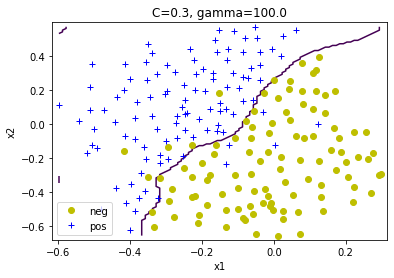

In [65]:
plot_data(X_train_0, y_train_0)
plot_boundary(X_train_0, clf_best)
plt.title(f'C={clf_best.C:.4}, gamma={clf_best.gamma:.4}')

##Spam classification

In [67]:
!wget https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/spamTrain.mat?raw=true
!mv spamTrain.mat?raw=true data.mat
data_train = io.loadmat('data.mat')

--2019-12-15 17:03:45--  https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/spamTrain.mat?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/krasserm/machine-learning-notebooks/raw/master/data/ml-ex6/spamTrain.mat [following]
--2019-12-15 17:03:45--  https://github.com/krasserm/machine-learning-notebooks/raw/master/data/ml-ex6/spamTrain.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krasserm/machine-learning-notebooks/master/data/ml-ex6/spamTrain.mat [following]
--2019-12-15 17:03:45--  https://raw.githubusercontent.com/krasserm/machine-learning-notebooks/master/data/ml-ex6/spamTrain.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Con

In [68]:
!wget https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/spamTest.mat?raw=true
!mv spamTest.mat?raw=true data.mat
data_test = io.loadmat('data.mat')

--2019-12-15 17:04:05--  https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/spamTest.mat?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/krasserm/machine-learning-notebooks/raw/master/data/ml-ex6/spamTest.mat [following]
--2019-12-15 17:04:05--  https://github.com/krasserm/machine-learning-notebooks/raw/master/data/ml-ex6/spamTest.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krasserm/machine-learning-notebooks/master/data/ml-ex6/spamTest.mat [following]
--2019-12-15 17:04:06--  https://raw.githubusercontent.com/krasserm/machine-learning-notebooks/master/data/ml-ex6/spamTest.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecti

In [69]:
data_train

{'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [0]:
# Example feature vectors
X_train = data_train['X']
X_test = data_test['Xtest']

# Example classes (0=non-spam, 1=spam)
y_train = data_train['y'].ravel()
y_test = data_test['ytest'].ravel()

In [77]:
X_train, X_train.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), (4000, 1899))

In [79]:
# Train a linear SVC (running liblinear) using the 
# same value for C as in in the original exercise 
# (see ex6_spam.m)
clf = LinearSVC(C=0.1)
clf.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [80]:
# Training score
clf.score(X_train, y_train)

0.99975

In [81]:
# Test score
clf.score(X_test, y_test)

0.992

In [83]:
!wget https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/vocab.txt

--2019-12-15 17:09:45--  https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex6/vocab.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘vocab.txt’

vocab.txt               [  <=>               ] 422.00K  1.23MB/s    in 0.3s    

2019-12-15 17:09:46 (1.23 MB/s) - ‘vocab.txt’ saved [432130]



In [0]:
def read_file(file):
    with open(file) as f:
        return f.read()

In [87]:
vocab = {}

# Read provided vocabulary from vocab.txt file and add 
# content to vocab, converting 1-based to 0-based index
with open('vocab.txt') as vocab_file:
    for row in csv.reader(vocab_file, delimiter='\t'):
        word = row[1]
        index = int(row[0]) - 1
        vocab[word] = index

IndexError: ignored